In [1]:
import pandas as pd

In [53]:
preds = pd.read_csv('preds.csv')

/home/ailyra/hdd/anaconda3/envs/signate_jpx/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
preds.head()

,base_date,Local Code,label_date_5,label_high_5,label_low_5,label_date_10,label_high_10,label_low_10,label_date_20,label_high_20,...,Result_Dividend QuarterlyDividendPerShare,Forecast_Dividend FiscalPeriodEnd,Forecast_Dividend ReportType,Forecast_Dividend FiscalYear,Forecast_Dividend ModifyDate,Forecast_Dividend QuarterlyDividendPerShare,rr_high,rr_low,lgbm_high,lgbm_low
0,2020-02-03,1301,2020-02-10,0.02973,-0.00142,2020-02-18,0.03469,-0.00531,2020-03-04,0.03469,...,70.0,2020/03,Annual,2020.0,2019/11/05,70.0,0.046498,-0.125133,0.055364,-0.120470
1,2020-02-04,1301,2020-02-12,0.02203,0.00210,2020-02-19,0.02203,-0.01748,2020-03-05,0.02203,...,70.0,2020/03,Annual,2020.0,2019/11/05,70.0,0.048310,-0.125520,0.049342,-0.109270
2,2020-02-05,1301,2020-02-13,0.01776,-0.00557,2020-02-20,0.01776,-0.02507,2020-03-06,0.01776,...,70.0,2020/03,Annual,2020.0,2019/11/05,70.0,0.049182,-0.122653,0.053291,-0.110984
3,2020-02-06,1301,2020-02-14,0.01423,-0.01423,2020-02-21,0.01423,-0.02984,2020-03-09,0.01423,...,70.0,2020/03,Annual,2020.0,2019/11/05,70.0,0.049522,-0.122336,0.053291,-0.110672
4,2020-02-07,1301,2020-02-17,0.01212,-0.01835,2020-02-25,0.01212,-0.06960,2020-03-10,0.01212,...,70.0,2020/03,Annual,2020.0,2020/02/07,70.0,0.047929,-0.126248,0.049342,-0.106026


In [55]:
preds[['base_date', 'Name (English)', 'label_high_20', 'rr_high', 'lgbm_high', 'label_low_20', 'rr_low', 'lgbm_low']]

,base_date,Name (English),label_high_20,rr_high,lgbm_high,label_low_20,rr_low,lgbm_low
0,2020-02-03,"KYOKUYO CO.,LTD.",0.03469,0.046498,0.055364,-0.09593,-0.125133,-0.120470
1,2020-02-04,"KYOKUYO CO.,LTD.",0.02203,0.048310,0.049342,-0.10699,-0.125520,-0.109270
2,2020-02-05,"KYOKUYO CO.,LTD.",0.01776,0.049182,0.053291,-0.11072,-0.122653,-0.110984
3,2020-02-06,"KYOKUYO CO.,LTD.",0.01423,0.049522,0.053291,-0.13185,-0.122336,-0.110672
4,2020-02-07,"KYOKUYO CO.,LTD.",0.01212,0.047929,0.049342,-0.17832,-0.126248,-0.106026
...,...,...,...,...,...,...,...,...
789147,2020-12-24,"BELLUNA CO.,LTD.",NaN,0.111655,0.086770,NaN,-0.088323,-0.081313
789148,2020-12-25,"BELLUNA CO.,LTD.",NaN,0.113315,0.086770,NaN,-0.089361,-0.086882
789149,2020-12-28,"BELLUNA CO.,LTD.",NaN,0.107823,0.085072,NaN,-0.090059,-0.087587
789150,2020-12-29,"BELLUNA CO.,LTD.",NaN,0.107403,0.085072,NaN,-0.090630,-0.087483


In [128]:
preds['Pred_Difference_rr_high'] = abs(preds['rr_high'] - preds['label_high_20'])
preds['Pred_Difference_lgbm_high'] = abs(preds['lgbm_high'] - preds['label_high_20'])

preds['Pred_Difference_rr_low'] = abs(preds['rr_low'] - preds['label_low_20'])
preds['Pred_Difference_lgbm_low'] = abs(preds['lgbm_low'] - preds['label_low_20'])

In [57]:
HIGH_biggest_over_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_high', ascending=False)[0:100]
HIGH_biggest_over_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_high', ascending=False)[0:100]

HIGH_biggest_under_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_high', ascending=True)[0:100]
HIGH_biggest_under_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_high', ascending=True)[0:100]

In [58]:
LOW_biggest_over_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_low', ascending=False)[0:100]
LOW_biggest_over_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_low', ascending=False)[0:100]

LOW_biggest_under_pred_errors_rr = preds.sort_values(by='Pred_Difference_rr_low', ascending=True)[0:100]
LOW_biggest_under_pred_errors_lgbm = preds.sort_values(by='Pred_Difference_lgbm_low', ascending=True)[0:100]

In [ ]:
## Sort Values by Stock Performance 10 best - 10 worst get those plots. 

In [177]:
import matplotlib.pyplot as plt
# Used to plot stocks 

def plot_data(column_to_check: str, preds: pd.DataFrame, best_or_worst: str, total_plots:int=10):
    if best_or_worst == 'best':
        codes = preds.groupby('Local Code')[f'{column_to_check}'].mean().sort_values(ascending=True)
    else: 
        codes = preds.groupby('Local Code')[f'{column_to_check}'].mean().sort_values(ascending=False)
        
    for code in codes[0:total_plots].index:
        df = preds[preds['Local Code'] == code]
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.gca()
        df.set_index('base_date')[f'label_high_20'].plot(ax=ax1, label='actual_high', color='blue')
        df.set_index('base_date')[f'lgbm_high'].plot(ax=ax1, color='purple', linestyle='dashed', label='lgbm_high')
        df.set_index('base_date')[f'label_low_20'].plot(ax=ax1, label='actual_low', color='red')
        df.set_index('base_date')[f'lgbm_low'].plot(ax=ax1, color='purple', linestyle='dashed', label='lgbm_low')
        
        df.set_index('base_date')[f'rr_high'].plot(ax=ax1, color='teal', linestyle='dashed', label='rr_high')
        df.set_index('base_date')[f'rr_low'].plot(ax=ax1, color='teal', linestyle='dashed', label='rr_low')
        plt.legend()
        plt.title(f"{df['Name (English)'].unique()[0]}: {codes[code]}")

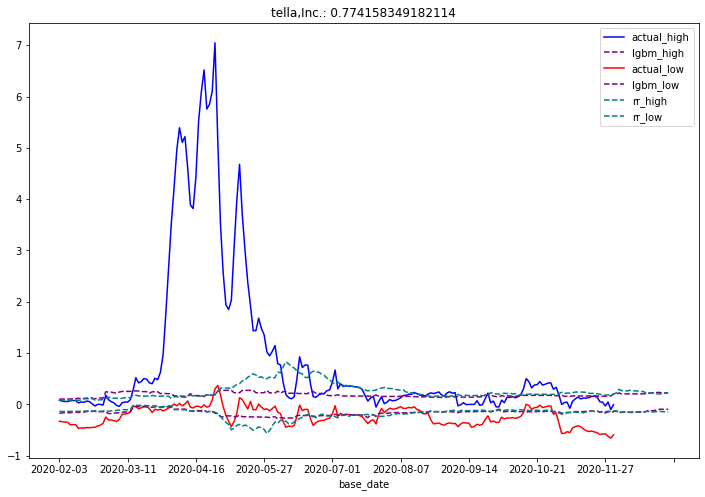

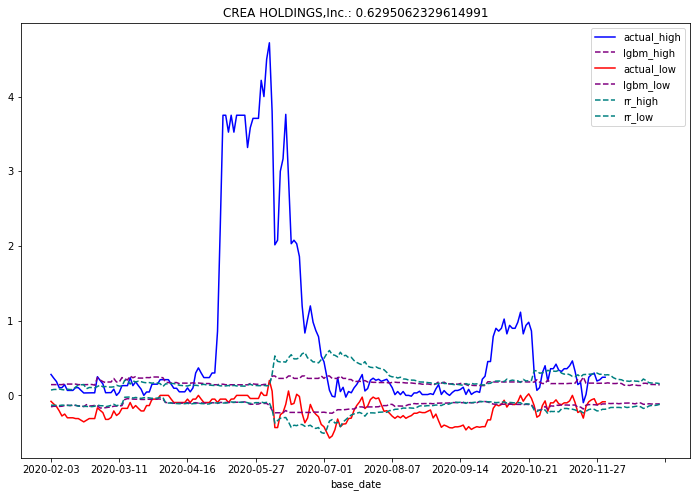

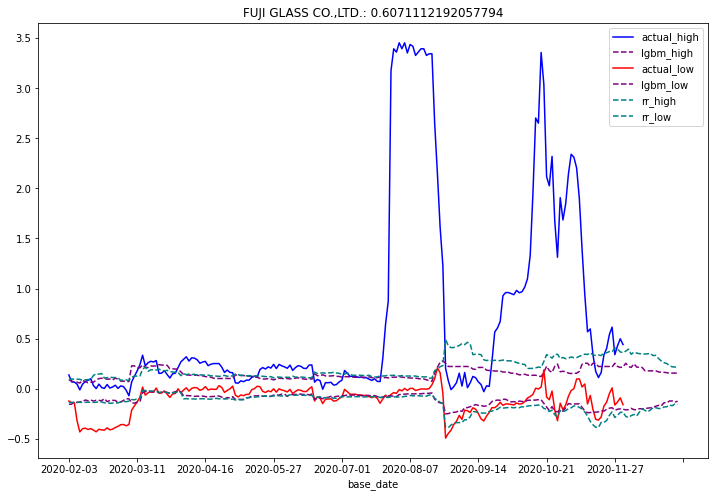

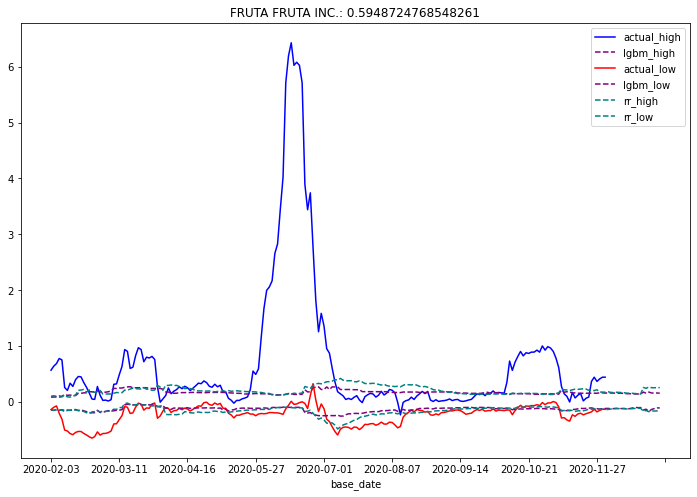

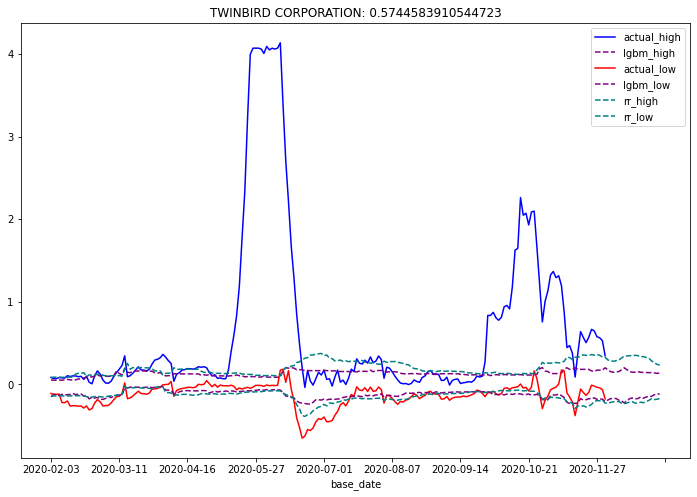

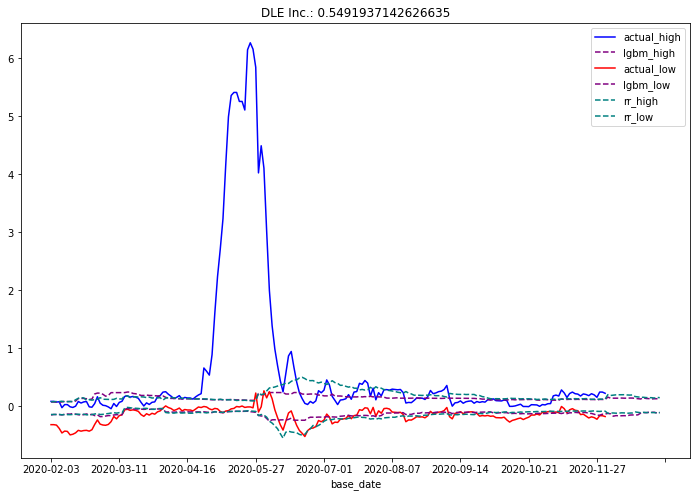

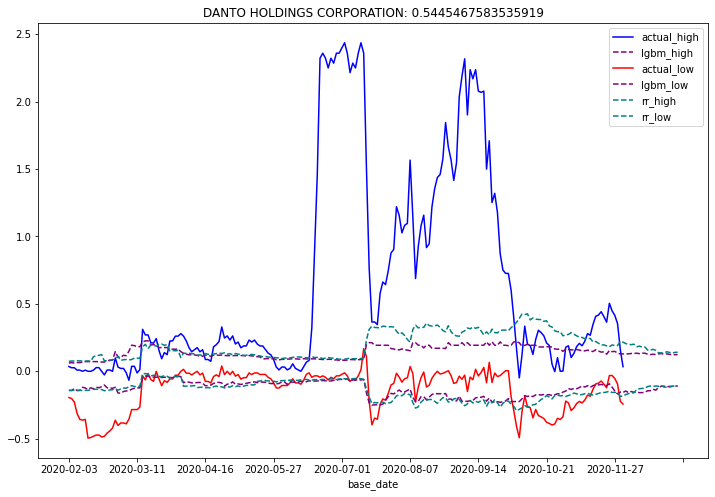

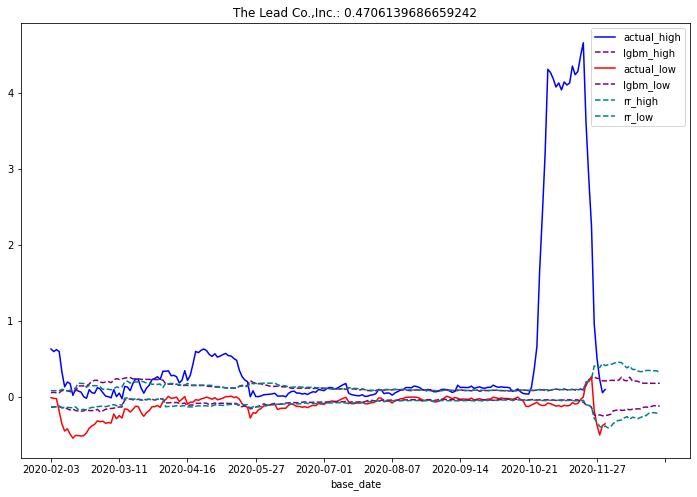

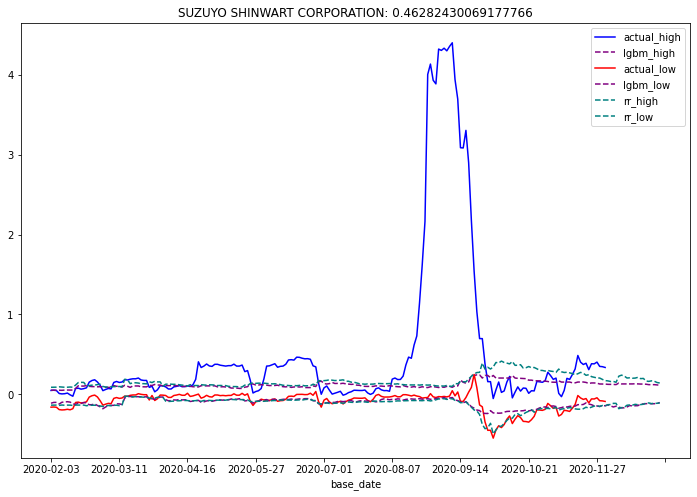

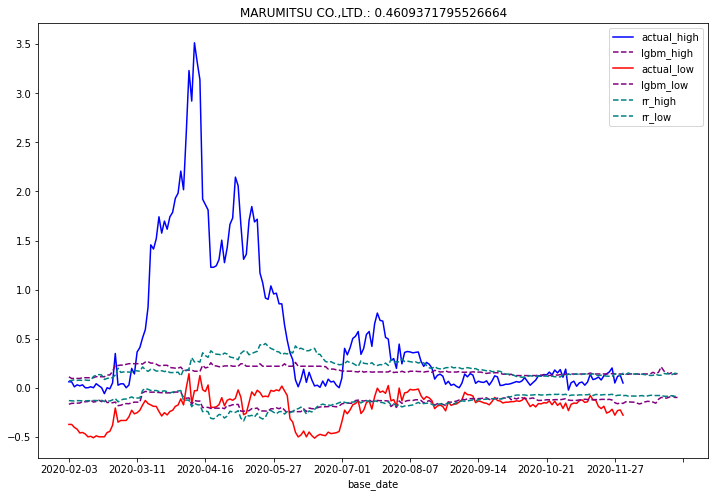

In [180]:
## 
# Column_to_check 
# Options 
# "Pred_Difference_rr_high" - Choose plots based on Ridge Regression high model 
# "Pred_Difference_rr_low" - Choose plots based on Ridge Regression low model 
# "Pred_Difference_lgbm_high" - Choose plots based on lgbm high model
# "Pred_Difference_lgbm_low" - Choose plots based on lgbm low model 

## Best_or_worst - 
# Can be 'best' to get best performing stocks given model
# can be 'worst' to get worst performing stocks given model

plot_data('Pred_Difference_lgbm_high', preds, 'worst')